# Incremental WCM

## Word Context Matrix


The Word Context Matrix is widely used for constructing count-based word representations in static environments. The matrix has dimensions V x C, where V represents the vocabulary size, and C represents the number of context words. If the vocabulary of the target and context words is the same, the dimensionality of the matrix becomes |V| × |V|. The context words are selected based on their proximity to a vocabulary word in a sliding window, the size of which is determined by the user and can range from 1 to 8 surrounding words.

For instance, given the sentence "the dog barked very loudly," with the vocabulary word "barked," the context words would be "the" and "dog" on the left and "very" and "loudly" on the right if the window length were set to 2.

The relationship between a vocabulary word and its context words is weighted using various strategies, including co-occurrence counts, positive point-wise mutual information (PPMI), and paired t-test values. The most commonly used measure among the three is PPMI, which filters conventional PMI values by setting negative values to zero and calculates the logarithm of the joint probability of a vocabulary word and its context over the probability of their occurrence independently.  The following image illustrates how the matrix is built from the three examples sentences considering a sliding window of 1.


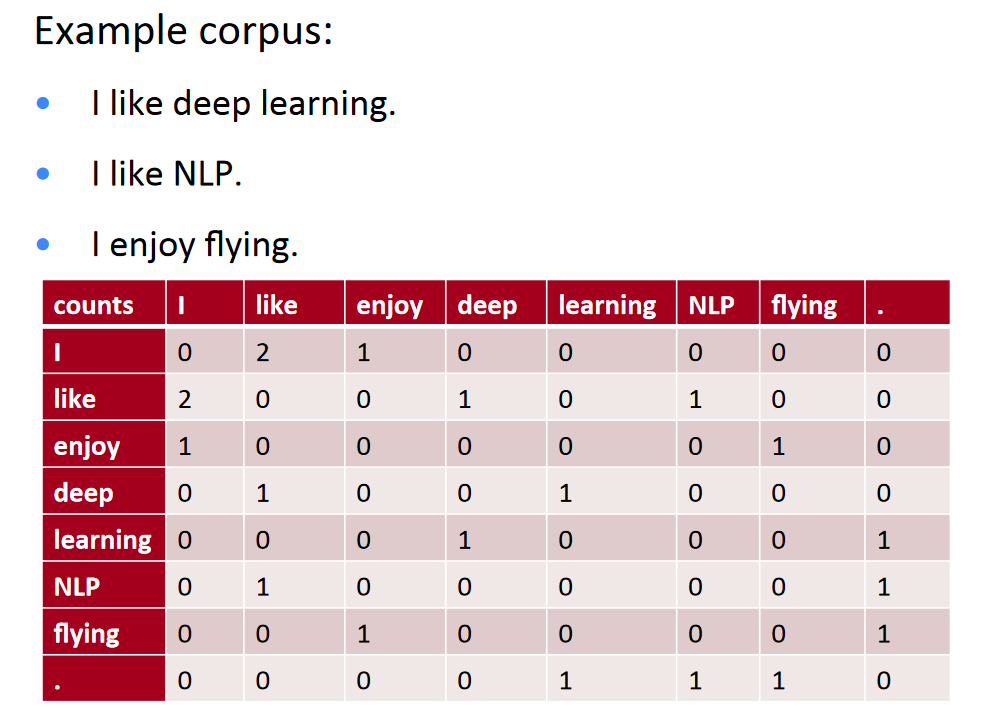

## Incremental Word Context Matrix

The implementation of incremental word embedding using the PPMI weight must consider the following important considerations:

* One-time processing: Each line of text or tweet is processed only once and discarded after that.

* Incremental calculation of probabilities: The probabilities of the PPMI must be calculated incrementally, requiring memory to store the intermediate results.

* Adaptation to a streaming setting: The algorithm must be flexible enough to adapt to a streaming setting, where the vocabulary and context words may be unknown in advance.

These considerations are crucial for building an effective incremental word embedding model using the PPMI method. The model's performance and accuracy depend on how well these considerations are addressed and implemented in the algorithm.

In terms of the hyperparameters, it is essential to consider the size of the vocabulary (V), the size of the contexts (C), and the size of the sliding window (W). These hyperparameters have a direct impact on the dimensionality of the incremental Word Context matrix, which is restricted to V x C, and is not necessarily square. The careful selection and tuning of these hyperparameters can help to achieve optimal performance and accuracy in the word embedding model.


<img src=" 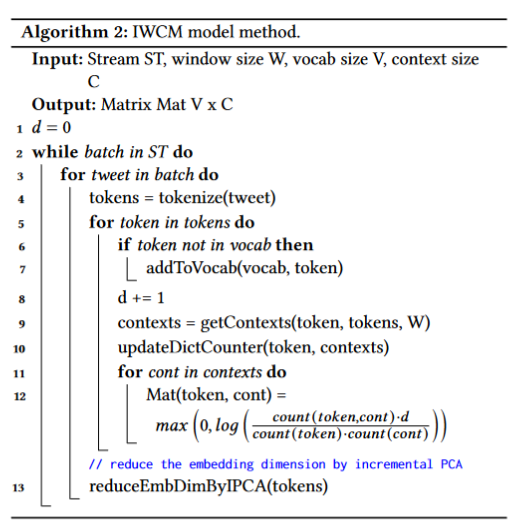">

In our implementation, a sliding window of 2W tokens is used to extract context information from the tokenized tweets in the text stream. The center of the window aligns with a target word, and all surrounding tokens within the window are considered context tokens. When a target word or context is encountered for the first time, a new entry is dynamically created in the VectorDict objects and initialized with a count value of zero. When an existing target word or context is encountered, the corresponding counters are updated incrementally. This approach allows for efficient storage and manipulation of the word-context matrix while maintaining an acceptable level of accuracy.

However, one limitation of this method is that, like its static counterpart, the IWCM model produces sparse and high-dimensional vectors. To address this issue, we use incremental Principal Component Analysis (PCA) to reduce the dimensionality of the generated embeddings. This algorithm processes the data as a vector stream, so it doesn't require multiple passes over the entire set of embeddings to achieve dimensionality reduction. In addition, our IWCM implementation selectively applies dimensionality reduction to recently added or updated embedding vectors to optimize computational efficiency.

### import libraries

In [ ]:
from rivertext.utils import TweetStream
from torch.utils.data import DataLoader

from rivertext.models import WordContextMatrix

### Define the Stream

In [ ]:
ts = TweetStream("tweets.txt")
dataloader = DataLoader(ts, batch_size=32)

### Define the model

In [ ]:
wcm = WordContextMatrix(
    vocab_size=1_000_000,
    window_size=3,
    context_size=500
)

### Training loop

In [ ]:
for tweet in dataloader:
    wcm.learn_many(tweet)

### Getting the embeddings

In [ ]:
embs = wcm.vocab2dict()

In [ ]:
embs['gluetext']